# Experiments with Nikita's formula

### Implementing function to compute L-value

$${L =\frac{\sqrt{\sum_{j=1}^{n}\sum_{i=1}^{n}(\sqrt{\sum_{k=i}^{j}{(a_{k}^{2}+b_{k}^{2}-c_{k}^{2}-d_{k}^{2}})^{2}+(\sum_{k=i}^{j}2(b_{k}c_{k}-a_{k}d_{k}))^{2}+(\sum_{k=i}^{j}2(a_{k}c_{k}+b_{k}d_{k}))^{2}}-\frac{\sum_{m=1}^{n}\sum_{p=1}^{n}(\sqrt{(\sum_{k=m}^{p}a_{k}^{2}+b_{k}^{2}-c_{k}^{2}-d_{k}^{2})^{2}+(\sum_{k=m}^{p}2(b_{k}c_{k}-a_{k}d_{k}))^{2}+(\sum_{k=m}^{p}2(a_{k}c_{k}+b_{k}d_{k}))^{2}})}{n(n-1)})^{2}}}{d_{londest}}}$$

In [1]:
import numpy
import math

In [2]:
def compute_L(knot):
    quat_arr = two_complex_to_quaternion(numpy.hstack(knot.initial_random_vectors))
    n = quat_arr.shape[0]
    
    
    acc_j=0
    for j in range(0,n):
        acc_i=0
        for i in range(0,n):            
            #(a^2+b^2-c^2-d^2)^2
            acc_k_0 = 0
            for k in range(i,j+1):
                acc_k_0 += quat_arr[k,0]**2+quat_arr[k,1]**2-quat_arr[k,2]**2-quat_arr[k,3]**2
            acc_k_0 = acc_k_0**2
            
            #(2(b*c-a*d))^2
            acc_k_1 = 0
            for k in range(i,j+1):
                acc_k_1 += quat_arr[k,1]*quat_arr[k,2]-quat_arr[k,0]*quat_arr[k,3]
            acc_k_1 = (2*acc_k_1)**2
            
            #(2(a*c+b*d))^2
            acc_k_2 = 0
            for k in range(i,j+1):
                acc_k_2 += quat_arr[k,0]*quat_arr[k,2]+quat_arr[k,1]*quat_arr[k,3]
            acc_k_2 = (2*acc_k_2)**2
            
            left_k = math.sqrt(acc_k_0+acc_k_1+acc_k_2)
            
            #right side of minus
            right_k = compute_right_k(quat_arr,n)
            
            acc_i+=left_k-right_k
        acc_j+=acc_i
        
    d_longest = compute_d_longest(knot)#numpy.max(quat_arr[:,3])
    return math.sqrt(acc_j**2)/d_longest

def compute_right_k(quat_arr,n):
    acc_m=0
    for m in range(0,n):
        acc_p=0
        for p in range(0,n):            
            #(a^2+b^2-c^2-d^2)^2
            acc_k_0 = 0
            for k in range(m,p+1):
                acc_k_0 += quat_arr[k,0]**2+quat_arr[k,1]**2-quat_arr[k,2]**2-quat_arr[k,3]**2
            acc_k_0 = acc_k_0**2
            
            #(2(b*c-a*d))^2
            acc_k_1 = 0
            for k in range(m,p+1):
                acc_k_1 += quat_arr[k,1]*quat_arr[k,2]-quat_arr[k,0]*quat_arr[k,3]
            acc_k_1 = (2*acc_k_1)**2
            
            #(2(a*c+b*d))^2
            acc_k_2 = 0
            for k in range(m,p+1):
                acc_k_2 += quat_arr[k,0]*quat_arr[k,2]+quat_arr[k,1]*quat_arr[k,3]
            acc_k_2 = (2*acc_k_2)**2
            
        acc_p+=math.sqrt(acc_k_0+acc_k_1+acc_k_2)
    acc_m+=acc_p
    return acc_m/(n*(n-1))

def compute_d_longest(knot):
    max_distance = 0
    for vertex1_index in range(0,knot.vertices.shape[0]-1):
        for vertex2_index in range(vertex1_index,knot.vertices.shape[0]):
            x1,y1,z1 = knot.vertices[vertex1_index]
            x2,y2,z2 = knot.vertices[vertex2_index]
            distance = math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
            if distance>max_distance:
                max_distance = distance
    return max_distance

#### Trying to use the formula on a single knot

In [3]:
from Knot import Knot
from polygon_generation import two_complex_to_quaternion

Could not import cythonised chelpers, using Python alternative. This will give the same result, but is slower.


In [4]:
k=Knot(10)

Prepare knot data to be used by a function

In [5]:
quat = two_complex_to_quaternion(numpy.hstack(k.initial_random_vectors))
quat

array([[-0.10724746,  0.02206309, -0.07363437,  0.11314765],
       [ 0.01111144,  0.07719862,  0.01085069, -0.04007913],
       [-0.04265445,  0.07348685, -0.14077364, -0.08225034],
       [-0.07730301,  0.13358235, -0.05355389, -0.04840375],
       [-0.17953775, -0.06116307,  0.19231816, -0.0299549 ],
       [ 0.01693647,  0.18853111,  0.00849724,  0.05582698],
       [-0.03414746,  0.23052773, -0.02400299,  0.10191053],
       [-0.06957024,  0.0256301 , -0.04405057, -0.01801645],
       [ 0.07118419,  0.07421556, -0.08666576, -0.1348619 ],
       [-0.12411549,  0.0517343 , -0.03538354,  0.04715654]])

In [6]:
quat.shape

(10, 4)

In [7]:
compute_L(k)

6.623420081739144

### L vs Knot Emptiness correlation experiment

Trying to find a correlation between L-value and knot ID emptiness. First, generate a lot of knots, store their L-value and whether their ID was empty or not

In [8]:
number_of_knots = 1000000
stick_number = 11

empty = open("empty.lval", "a")
num_empty=0
non_empty = open("non_empty.lval", "a")    

for _ in range(0,number_of_knots):
    k=Knot(stick_number)    
    L=compute_L(k)
    if k.knot_ID == []:
        empty.write(str(L)+'\n')       
        num_empty+=1     
    else:
        non_empty.write(str(L)+'\n')
        non_empty.flush()
print("Generated "+str(number_of_knots)+" knots: "+str(num_empty)+" of them were empty")

empty.close()
non_empty.close()

KeyboardInterrupt: 

In [18]:
number_of_knots = 1000000
stick_number = 11

empty = open("empty.lval", "a")
num_empty=0
non_empty = open("non_empty.lval", "a")    

for _ in range(0,number_of_knots):
    k=Knot(stick_number)        
    if k.knot_ID != []:
        L=compute_L(k)
        non_empty.write(str(L)+'\n')
        non_empty.flush()
print("Generated "+str(number_of_knots)+" knots: "+str(num_empty)+" of them were empty")

empty.close()
non_empty.close()

KeyboardInterrupt: 

In [19]:
empty = open("empty.lval", "r").readlines()
non_empty = open("non_empty.lval", "r").readlines()

empty=list(map(float,empty))
non_empty=list(map(float,non_empty))


In [20]:
numpy.min(numpy.hstack((empty,non_empty)))

2.139432058663218

In [21]:
(len(empty), len(non_empty))

(312051, 2612)

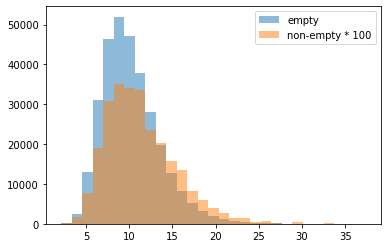

In [32]:
import numpy
from matplotlib import pyplot
%matplotlib inline

min_L = numpy.min(numpy.hstack((empty,non_empty)))
max_L = numpy.max(numpy.hstack((empty,non_empty)))
bins = numpy.linspace(min_L, max_L, 30)

pyplot.hist(empty, bins, alpha=0.5, label='empty')
ampl=100
pyplot.hist(non_empty*ampl, bins, alpha=0.5, label='non-empty * '+str(ampl))
pyplot.legend(loc='upper right')
pyplot.show()
